In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Description

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [2]:
df = pd.read_csv("Bike-Sharing-Dataset/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Q1.1

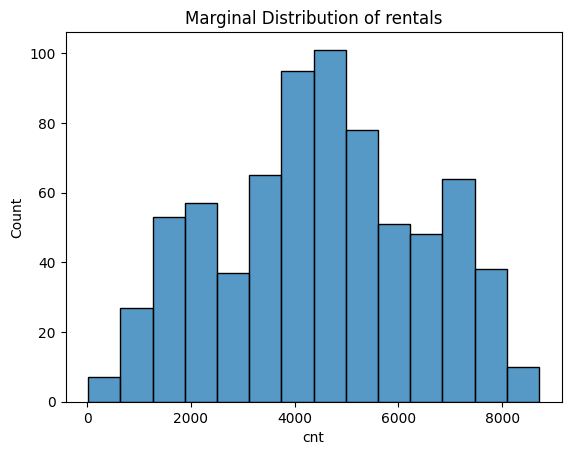

In [3]:
# marginal distribution
sns.histplot(df['cnt'])
plt.title('Marginal Distribution of rentals')
plt.show()

In [4]:
unique_weathers = df['weathersit'].unique()

In [5]:
unique_weathers

array([2, 1, 3])

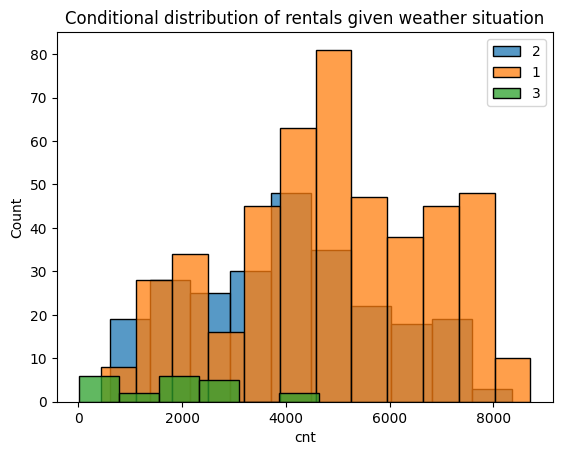

In [6]:
# Conditional Distribution
unique_weathers = df['weathersit'].unique()
for weather in unique_weathers:
    subset = df[df['weathersit'] == weather]
    sns.histplot(subset['cnt'], label=weather)

plt.title('Conditional distribution of rentals given weather situation')
plt.legend()
plt.show()

# Q1.2

In [7]:
from sklearn.linear_model import LinearRegression

y = df["cnt"]
X = df["weathersit"].to_numpy().reshape(-1,1)
# Create a linear regression model
model = LinearRegression(fit_intercept=True).fit(X,y)
print("Coefficient:", model.coef_)

Coefficient: [-1057.28701717]


# Q1.3

In [8]:
weather_1 = np.array([1]).reshape(-1,1)
weather_3 = np.array([3]).reshape(-1,1)
expected_cnt_1 = model.predict(weather_1)
expected_cnt_3 = model.predict(weather_3)
diff = expected_cnt_1 - expected_cnt_3
print("Difference in expected ride counts between clear and wet is: ", diff)

Difference in expected ride counts between clear and wet is:  [2114.57403433]


# Q1.4

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X)
rss = sum((y - y_pred) ** 2)
r2 = r2_score(y, y_pred)

sigma = ((rss / len(y)) ** (1/2))

print("RSS:", round(rss,4))
print("R Sqaure:", round(r2,4))
print("Standard Deviation of Residual Errors:", round(sigma,4))


RSS: 2497246638.61
R Sqaure: 0.0884
Standard Deviation of Residual Errors: 1848.2982


# Q1.5

In [10]:
X = df[['weathersit','temp','hum','windspeed']]
y = df['cnt']

model = LinearRegression(fit_intercept=True).fit(X,y)
tmax = 39
tmin = -8
print("Coefficient:", model.coef_)
print("A 10 degree increase in the temperature will result in a rise of expected ride count by ",model.coef_[1]*10/(tmax-tmin))

Coefficient: [ -484.77409648  6371.0061281  -1881.83746743 -4210.83934555]
A 10 degree increase in the temperature will result in a rise of expected ride count by  1355.533218743626


# Q1.6

In [11]:
ori_term = df[['temp','hum','windspeed']]

interact_term = pd.DataFrame()

for col in ori_term.columns:
    interact_term['weathersit*{}'.format(col)] =ori_term[col] * df['weathersit']
    
X = pd.concat([interact_term,ori_term,df['weathersit']],axis = 1)
y = df['cnt']
tmax = 39
tmin = -8

model = LinearRegression(fit_intercept=True).fit(X,y)

w1_coef = (model.coef_[0]+model.coef_[3])/(tmax-tmin)*10
w2_coef = (2*model.coef_[0]+model.coef_[3])/(tmax-tmin)*10
w3_coef = (3*model.coef_[0]+model.coef_[3])/(tmax-tmin)*10


print(model.coef_)
print("When the weathersit is 1, a 10 degree increase in the temperature will result in a rise of expected ride count by ",round(w1_coef,4))
print("When the weathersit is 2, a 10 degree increase in the temperature will result in a rise of expected ride count by ",round(w2_coef,4))
print("When the weathersit is 3, a 10 degree increase in the temperature will result in a rise of expected ride count by ",round(w3_coef,4))


[  765.35238965 -1360.01465425 -2686.47892364  5346.67706166
   315.90526836   -53.59821324   603.44166735]
When the weathersit is 1, a 10 degree increase in the temperature will result in a rise of expected ride count by  1300.4318
When the weathersit is 2, a 10 degree increase in the temperature will result in a rise of expected ride count by  1463.2727
When the weathersit is 3, a 10 degree increase in the temperature will result in a rise of expected ride count by  1626.1137


# Q1.7

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

X = df[['weathersit','temp','hum','windspeed']]
y = df['cnt'].apply(lambda x: 1 if x > 4000 else 0)
model = LogisticRegression()
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')
print("The mean of accuracies is: ",accuracies.mean())

The mean of accuracies is:  0.8262044543844935


# Q1.8

In [13]:
thresholds = [1000+1000*i for i in range(0,8)]
for threshold in thresholds:
    X = df[['weathersit','temp','hum','windspeed']]
    y = df['cnt'].apply(lambda x: 1 if x > threshold else 0)
    model = LogisticRegression()
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')
    f1_score = cross_val_score(model, X, y, cv=stratified_kfold, scoring='f1')
    print("For threshold {}, the mean of accuracies is: {} and the mean of F1 scores is: {} ".format(threshold,round(accuracies.mean(),2),round(f1_score.mean(),2)))

For threshold 1000, the mean of accuracies is: 0.97 and the mean of F1 scores is: 0.99 
For threshold 2000, the mean of accuracies is: 0.88 and the mean of F1 scores is: 0.94 
For threshold 3000, the mean of accuracies is: 0.86 and the mean of F1 scores is: 0.91 
For threshold 4000, the mean of accuracies is: 0.83 and the mean of F1 scores is: 0.86 
For threshold 5000, the mean of accuracies is: 0.71 and the mean of F1 scores is: 0.58 
For threshold 6000, the mean of accuracies is: 0.73 and the mean of F1 scores is: 0.18 
For threshold 7000, the mean of accuracies is: 0.87 and the mean of F1 scores is: 0.0 
For threshold 8000, the mean of accuracies is: 0.98 and the mean of F1 scores is: 0.0 


# Q1.8 Rationale
F1 score captures the balance between precision and recall, it is suitable for imbalanced dataset. In contrast, accuracies can be misleading when facing an imbalanced dataset. Therefore, I priotized optimizing F1 score by feeding different thresholds to find the model. The result showes that 1000 is the optimal threshold as it generate the largest F1 score overall. The mean of accuracies has also been improved by 14 percentage points.

# Q2.1
Flexbile methods are expected to perform better. Given a large sample size, a flexible method is more likelty to fit the train set well without overfitting. Given a small number of predictors, an inflexible method is more likely underfit the train set.

# Q2.2

Inflexible methods are expected to perform better. Given a small sample size and a large number of predictors, a flexible method is likely to capture more error and then cause overfitting. An inflexible method has a lower capability to capture the error term which help prevent overfitting in this case.

# Q2.3
In case there are relationships, a flexibile method is more likely to perform better because it has more linient condition and higher capability to discover better. An inflexible method tends to capture simple relationship, like a linear one. Also, some inflexible methods have strict assumptions in order to perform well, like multicollinearity assumption in a regression model.

# Q2.4
The high variance of the error term suggests that there is a strong impact from noise. An inflexible method is more likely to perform well in such scenarios, as a more flexible one may capture more information from the error term, which might cause overfitting. 

# Q3

An example for inference is to fit a regression model to explore the relationship between the GDP growth rate and the mean length of education. The response variable is the GDP growth rate per region and the predictor variables will include the mean length of education and other relevant variables. It is an inference task because a researcher cares about wether the education can drive economic growth. By clarifying the effect of education on the economy, policy makers and stakeholders can make an informed decisions about investing in educaiton. In this case, the accuracy is not that important as the main goal is to explain the driving factor.

An example for prediction is to fit a regression model to predict the stock price movement. The response variable is the return of a certain stock. The predictor variables can include a return of that stock from the previous period(t-1) or return rate of stocks in the same industry(t-1 period), macroeconomic indicators and so on. It is a prediction task becasue investors cares about whether they can correctly predict the future in order to profit from this prediction. A minor difference in accuracy can make a difference when realizing gain or loss.

# Q4.1
$$
\text{plug in x } = \bar{x}
\newline \because \hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}
\newline y = \hat{\beta_0} + \hat{\beta_1}x
\newline \therefore y = (\bar{y} - \hat{\beta_1} \bar{x}) + \hat{\beta_1}\bar{x} = \bar{y}
\newline \text{Therefore, the OLS line always pass } (\bar{x},\bar{y})
$$



# Q4.2
$$
\newline \text{The correlation between x and y is:}
\newline \because \text{Cor}(x, y) = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} 
\newline \therefore \text{Cor}^2(x, y) = \frac{(\sum (x_i - \bar{x})(y_i - \bar{y}))^2}{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2} = R^2
\newline \text{This is the} R^2 \text{in simple linear regression.}
$$

# Q4.3
The logistic function representation is:

$$\newline \because p(x) = \frac{e^{\beta_0 + \beta_1x}}{1 + e^{\beta_0 + \beta_1x}}
\newline \therefore p(x)(1+e^{\beta_0 + \beta_1x}) = e^{\beta_0 + \beta_1x}
\newline \frac{p(x)}{(1-p(x))} = e^{\beta_0 + \beta_1x}
\newline \therefore \ln{(\frac{p(x)}{(1-p(x))})} =  \beta_0 + \beta_1x
$$
This is the logit representation. It is equivalent to the logistic function representation.

# Q5.1

In [14]:
import math
beta0, beta1, beta2 = -4,0.03,0.5
x1,x2 = 30,5
linear_part = beta0+ beta1*x1 + beta2*x2
prob = (math.e**(linear_part))/(1+math.e**(linear_part))
print("The probability of promotion for that employee is: ", prob)

The probability of promotion for that employee is:  0.3543436937742045


# Q5.2

In [15]:
beta0, beta1, beta2 = -4,0.03,0.5
x2 = 5
prob = 0.5
x1 = (math.log(prob/(1-prob)) - beta0 - beta2*x2)/beta1
print("The employee shoud undertake {:.2f} hours of professional development to have a 50% chance of promotion".format(x1))

The employee shoud undertake 50.00 hours of professional development to have a 50% chance of promotion
